In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
file_path = "C:/Users/Lenovo/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv"  # Update path if needed
df = pd.read_csv(file_path, parse_dates=['SETTLEMENTDATE'], index_col='SETTLEMENTDATE')


In [4]:
import pandas as pd

file_path = "C:/Users/Lenovo/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv"

# Read the CSV without parsing dates
df = pd.read_csv(file_path)

# Print column names
print(df.columns)


Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'RRP', 'PERIODTYPE'], dtype='object')


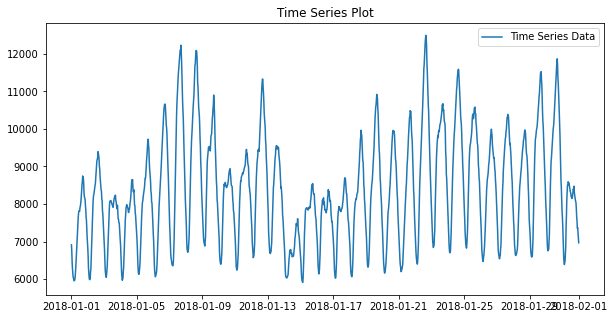

In [7]:

series = df['TOTALDEMAND'] 

# Plot time series
plt.figure(figsize=(10,5))
plt.plot(series, label="Time Series Data")
plt.legend()
plt.title("Time Series Plot")
plt.show()


In [8]:
def adf_test(series):
    result = adfuller(series.dropna())
    print("ADF Test:")
    print(f"Test Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("Conclusion: Reject Null Hypothesis (Data is Stationary)")
    else:
        print("Conclusion: Fail to Reject Null (Data is Non-Stationary)")

In [9]:
def kpss_test(series):
    result = kpss(series.dropna(), regression='c', nlags="auto")
    print("\nKPSS Test:")
    print(f"Test Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Critical Values: {result[3]}")
    if result[1] < 0.05:
        print("Conclusion: Reject Null Hypothesis (Data is Non-Stationary)")
    else:
        print("Conclusion: Fail to Reject Null (Data is Stationary)")


In [10]:
adf_test(series)
kpss_test(series)

ADF Test:
Test Statistic: -4.5267
p-value: 0.0002
Critical Values: {'1%': -3.434827656046504, '5%': -2.86351758903648, '10%': -2.5678228503262757}
Conclusion: Reject Null Hypothesis (Data is Stationary)

KPSS Test:
Test Statistic: 0.5265
p-value: 0.0357
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: Reject Null Hypothesis (Data is Non-Stationary)
